<a href="https://colab.research.google.com/github/pyrozhenko/Mashine-Navchanya/blob/main/Krlab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # Нормалізація

# Преобразуємо мітки в one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


170498071/170498071 [==============================] - 4s 0us/step


In [2]:
def create_cnn_model(num_layers, activation_func):
    model = models.Sequential()

    # Перший згортковий шар
    model.add(layers.Conv2D(32, (3, 3), activation=activation_func, input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Додавання додаткових згорткових шарів
    for _ in range(num_layers - 1):
        model.add(layers.Conv2D(64, (3, 3), activation=activation_func))
        model.add(layers.MaxPooling2D((2, 2)))

    # Повністю з'єднаний шар
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation=activation_func))

    # Вихідний шар
    model.add(layers.Dense(10, activation='softmax'))

    return model


Epoch 1/10
782/782 [==============================] - 40s 48ms/step - loss: 1.5359 - accuracy: 0.4504 - val_loss: 1.2832 - val_accuracy: 0.5463
Epoch 2/10
782/782 [==============================] - 35s 45ms/step - loss: 1.1863 - accuracy: 0.5849 - val_loss: 1.1203 - val_accuracy: 0.6032
Epoch 3/10
782/782 [==============================] - 35s 44ms/step - loss: 1.0559 - accuracy: 0.6334 - val_loss: 1.0277 - val_accuracy: 0.6384
Epoch 4/10
782/782 [==============================] - 35s 45ms/step - loss: 0.9744 - accuracy: 0.6620 - val_loss: 0.9994 - val_accuracy: 0.6510
Epoch 5/10
782/782 [==============================] - 35s 45ms/step - loss: 0.9089 - accuracy: 0.6862 - val_loss: 0.9563 - val_accuracy: 0.6661
Epoch 6/10
782/782 [==============================] - 35s 44ms/step - loss: 0.8529 - accuracy: 0.7057 - val_loss: 0.9536 - val_accuracy: 0.6724
Epoch 7/10
782/782 [==============================] - 34s 43ms/step - loss: 0.8050 - accuracy: 0.7199 - val_loss: 0.9503 - val_accuracy:

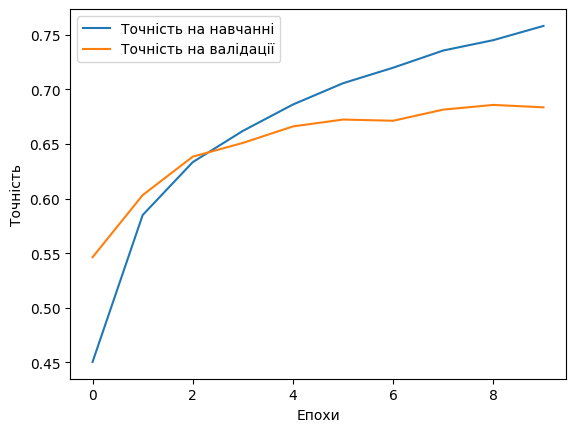

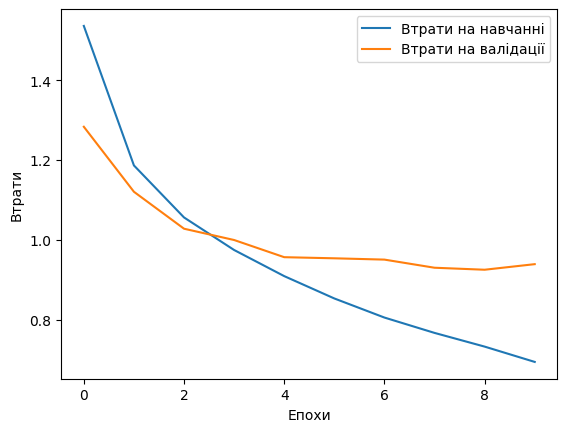

313/313 [==============================] - 2s 7ms/step - loss: 0.9389 - accuracy: 0.6836

Точність на тестових даних: 0.6836000084877014
Втрати на тестових даних: 0.9388750195503235


In [3]:
def train_and_evaluate_model(num_layers, activation_func, num_epochs, batch_size):
    model = create_cnn_model(num_layers, activation_func)

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size,
                        validation_data=(test_images, test_labels))

    # Виведення графіків
    plt.plot(history.history['accuracy'], label='Точність на навчанні')
    plt.plot(history.history['val_accuracy'], label='Точність на валідації')
    plt.xlabel('Епохи')
    plt.ylabel('Точність')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Втрати на навчанні')
    plt.plot(history.history['val_loss'], label='Втрати на валідації')
    plt.xlabel('Епохи')
    plt.ylabel('Втрати')
    plt.legend()
    plt.show()

    # Оцінка моделі на тестових даних
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f'\nТочність на тестових даних: {test_acc}')
    print(f'Втрати на тестових даних: {test_loss}')


# Визначення гіперпараметрів
num_layers = 2
activation_func = 'relu'
num_epochs = 10
batch_size = 64

# Навчання та оцінка моделі
train_and_evaluate_model(num_layers, activation_func, num_epochs, batch_size)
